# Group Project - BDT2
# Cross-Validation and HyperParameter Tunning


### Betsy Varghese, Sara Gutierrez, Andres Olivera

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, accuracy_score, precision_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [69]:
to_predict = pd.read_csv('C:/Users/aolivera/OneDrive - IESEG/IESEG/Courses/Second Semester/BDT2/Group Project/data_test.csv', sep=',')
train = pd.read_csv('C:/Users/aolivera/OneDrive - IESEG/IESEG/Courses/Second Semester/BDT2/Group Project/data_train.csv', sep=',')
test = pd.read_csv('C:/Users/aolivera/OneDrive - IESEG/IESEG/Courses/Second Semester/BDT2/Group Project/data_validation.csv', sep=',')

In [64]:
test_y = test['label']
test = test[['Avg_Subscription_Period_inMonths',
                'Total_meals_Regular',
                'Total_meals_Exceptional',
                'min(NbrMealsPrice)',
                'max(NbrMealsPrice)',
                'sum(TotalDiscount)',
                'min(TotalPrice)',
                'max(TotalPrice)',
                'Total_Credit_GF',
                'Total_NbrMeals_REG_GMax',
                'Total_Price_GMin',
                'Total_Credit_Card',
                'Total_Subscriptions_15',
                'Total_Subscriptions_16',
                'Total_Formula_Duration_DirectMail',
                'Avg_Formula_Duration_DirectMail',
                'Count_Formula_Reg',
                'OtherFeedback',
                'Total_Price_GF',
                'Total_Subscriptions',
                'Total_ProductDiscount_GMax',
                'Avg_Subscription_Period',
                'sum(ProductDiscount)',
                'min(TotalDiscount)',
                'Total_Subscriptions_14',
                'Total_Price_Card',
                'max(TotalDiscount)',
                'Total_Credit_Custom',
                'Total_NbrMealsPrice_GMax',
                'Customer_Lifetime']]

In [65]:
y_train = train['label']
train = train[['Avg_Subscription_Period_inMonths',
                'Total_meals_Regular',
                'Total_meals_Exceptional',
                'min(NbrMealsPrice)',
                'max(NbrMealsPrice)',
                'sum(TotalDiscount)',
                'min(TotalPrice)',
                'max(TotalPrice)',
                'Total_Credit_GF',
                'Total_NbrMeals_REG_GMax',
                'Total_Price_GMin',
                'Total_Credit_Card',
                'Total_Subscriptions_15',
                'Total_Subscriptions_16',
                'Total_Formula_Duration_DirectMail',
                'Avg_Formula_Duration_DirectMail',
                'Count_Formula_Reg',
                'OtherFeedback',
                'Total_Price_GF',
                'Total_Subscriptions',
                'Total_ProductDiscount_GMax',
                'Avg_Subscription_Period',
                'sum(ProductDiscount)',
                'min(TotalDiscount)',
                'Total_Subscriptions_14',
                'Total_Price_Card',
                'max(TotalDiscount)',
                'Total_Credit_Custom',
                'Total_NbrMealsPrice_GMax',
                'Customer_Lifetime']]

In [66]:
#Gradient Boosting
gb = GradientBoostingClassifier()

gbParam = {'learning_rate':[0.001, 0.01, 0.1, 0.5,0.8, 1], 'n_estimators':[100,500,1000,1750]}

#Random Forest
rfc=RandomForestClassifier()
rfcParams = {'n_estimators': [50,100,200,300,500],'max_features': ['auto', 'sqrt'],'max_depth' : [4,6,8]}

#Logistic Regression
lr = LogisticRegression()
c_space = np.logspace(-5, 8, 15)
lrParams = {'C': c_space}

#KNN
knn = KNeighborsClassifier()
knnlrParams = {'n_neighbors':[4,5,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree']}


In [67]:
random.seed(30)
#list of models for loop
models = (rfc, gb,lr,knn)
models2 = ('Random Forest', 'Gradient Boosting','Logistic Regression','KNN')
#list of param for loop
param = (rfcParams, gbParam,lrParams,knnlrParams)

auc = []
accuracy = []
modelparam= []
recall = []
precision = []
f1 = []

for i in range(len(models)):
    #Loop list of models and its parameters
    cv = GridSearchCV(models[i], param[i], cv=5)
    #Train model with train set
    cvModel = cv.fit(train, y_train)
    
    #Train:
    #Get probabilitie predictions on train
    preds_train = cvModel.predict_proba(train)[:,1]
    #Get numeric prediction on tran
    predi_num_t = cvModel.predict(train)
    
    #Test
    #Get probability predictions on test
    preds = cvModel.predict_proba(test)[:,1]
    #Get numeric prediction on test
    predi_num = cvModel.predict(test)
    
    
    #Save best model
    if i == 0: 
        model1 = cvModel
    elif i == 1:
        model2 = cvModel
    elif i == 2: 
        model3 = cvModel
    else:
        model4 = cvModel
    
     #save predictions of number of train
    if i == 0: 
        pred1_num_t = predi_num_t
    elif i == 1:
        pred2_num_t = predi_num_t
    elif i == 1:
        pred3_num_t = predi_num_t
    else:
        pred4_num_t = predi_num_t
    
       #save predictions of number of test
    if i == 0: 
        pred1_num = predi_num
    elif i == 1:
        pred2_num = predi_num
    elif i == 1:
        pred3_num = predi_num
    else:
        pred4_num = predi_num

        
        #save probability predictions of Train
    if i == 0: 
        pred1_t = preds_train
    elif i == 1:
        pred2_t = preds_train
    elif i == 1:
        pred3_t = preds_train
    else:
        pred4_t = preds_train
    
         #save probability predictions of Test
    if i == 0: 
        pred1 = preds
    elif i == 1:
        pred2 = preds
    elif i == 2:
        pred3 = preds
    else:
        pred4 = preds
    
    #METRICS
    #AUC
    test_roc_auc = roc_auc_score(test_y, preds)
    auc.append([roc_auc_score(test_y, preds)])
    #Accuracy
    accuracy.append([cvModel.score(test, test_y)])
    #Parameters best model
    modelparam.append(cvModel.best_estimator_)
    #Classification Report (precision    recall  f1-score   support)
    recall.append([recall_score(test_y,predi_num)])
    precision.append([precision_score(test_y,predi_num)])
    f1.append([f1_score(test_y,predi_num)])
    
#Creating Dataframe Metrics
metrics = pd.DataFrame(list(zip(models2,auc, accuracy, recall, precision,f1, modelparam )), columns =['Models', 'AUC','Accuracy','Recall','Precision','F1','Param']) 

#Round and Numeric variables
for x in metrics.iloc[:,1:6].columns:
     metrics[x] = metrics[x].astype(str)
     metrics[x] = metrics[x].str.replace("]"," ")
     metrics[x] = metrics[x].str.replace("["," ")
     metrics[x] = metrics[x].astype(float)
     metrics[x] = round(metrics[x],3)
metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

,Models,AUC,Accuracy,Recall,Precision,F1,Param
0,Random Forest,0.952,0.896,0.920,0.920,0.920,"(DecisionTreeClassifier(class_weight=None, cri..."
1,Gradient Boosting,0.976,0.927,0.964,0.926,0.945,([DecisionTreeRegressor(criterion='friedman_ms...
2,Logistic Regression,0.896,0.854,0.883,0.890,0.886,"LogisticRegression(C=163789.3706954068, class_..."
3,KNN,0.838,0.771,0.796,0.842,0.818,"KNeighborsClassifier(algorithm='auto', leaf_si..."


In [59]:
#Download Metrics
metrics.to_csv('C:/Users/aolivera/OneDrive - IESEG/IESEG/Courses/Second Semester/BDT2/Group Project/metrics.csv')

In [8]:
#Matching number of variables train and test
to_predict = to_predict[['Avg_Subscription_Period_inMonths',
                'Total_meals_Regular',
                'Total_meals_Exceptional',
                'min(NbrMealsPrice)',
                'max(NbrMealsPrice)',
                'sum(TotalDiscount)',
                'min(TotalPrice)',
                'max(TotalPrice)',
                'Total_Credit_GF',
                'Total_NbrMeals_REG_GMax',
                'Total_Price_GMin',
                'Total_Credit_Card',
                'Total_Formula_Duration_DirectMail',
                'Avg_Formula_Duration_DirectMail',
                'Count_Formula_Reg',
                'OtherFeedback',
                'Total_Price_GF',
                'Total_Subscriptions',
                'Total_ProductDiscount_GMax',
                'Avg_Subscription_Period',
                'sum(ProductDiscount)',
                'min(TotalDiscount)',
                'Total_Price_Card',
                'max(TotalDiscount)',
                'Total_Credit_Custom',
                'Total_NbrMealsPrice_GMax',
                'Customer_Lifetime']]


In [9]:
#Adding empty variables to match number of train variables
to_predict['ggggg'] = 0
to_predict['bbbbb'] = 0
to_predict['hhhh'] = 0

In [22]:
# predsmart = model2.predict_proba(datamart_2019)[:,1]
#Get numeric prediction on test
predi_proba = model1.predict_proba(to_predict)[:,1]
predi_number = model1.predict(to_predict)

In [48]:
#Convert CustomerID into dataframe to merge with predictions and probabilities
final = pd.DataFrame(to_predict['CustomerID'])

In [51]:
#Merging Predictions its probabilities with customer ID
final['prediction'] = predi_number
final['proba'] = predi_proba

In [33]:
#Seeing results
print('Churners')
(predi_proba >= 0.50)

Churners


341

In [57]:
final.to_csv('C:/Users/aolivera/OneDrive - IESEG/IESEG/Courses/Second Semester/BDT2/Group Project/predictions.csv')

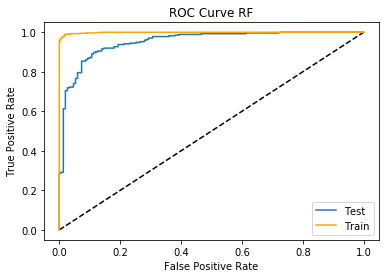

In [14]:
#PLOT of TRAIN and TEST ROC RF (second best performer)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_y, pred1)
fpr2, tpr2, thresholds = roc_curve(y_train,pred1_t)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= "Test")
plt.plot(fpr2, tpr2, label = "Train", color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend()
plt.show()

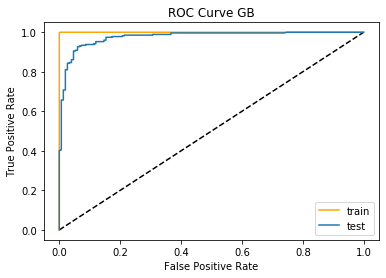

In [15]:
#PLOT of TRAIN and TEST ROC GB (second best performer)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train,pred2_t)
fpr2, tpr2, thresholds = roc_curve(test_y,pred2)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'train', color='orange')
plt.plot(fpr2, tpr2, label = 'test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GB')
plt.legend()
plt.show()

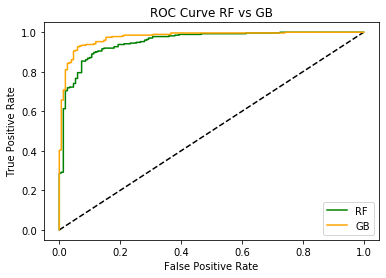

In [16]:
#FIRST and SECOND best performers

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_y,pred1)
fpr2, tpr2, thresholds = roc_curve(test_y,pred2)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'RF', color='green')
plt.plot(fpr2, tpr2, label = 'GB', color = 'orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF vs GB')
plt.legend()
plt.show()

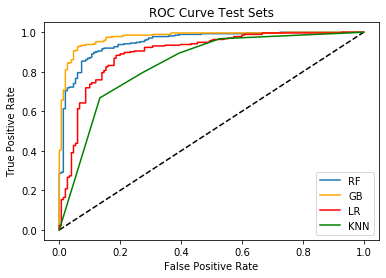

In [17]:
#PLOT of BENCHMARK TEST ROC CURVS

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_y,pred1)
b, bb, thresholds = roc_curve(test_y,pred2)
c, cc, thresholds = roc_curve(test_y,pred3)
d, dd, thresholds = roc_curve(test_y,pred4)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= "RF")
plt.plot(b, bb, label = "GB", color='orange')
plt.plot(c, cc, label = "LR", color='red')
plt.plot(d, dd, label = "KNN", color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test Sets')
plt.legend()
plt.show()